In [3]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from typing import List
from practical.ProcessMining.group1.task4.tokenreplay import TokenReplay
from practical.ProcessMining.group1.task4.comparison import ModelComparator
from practical.ProcessMining.group1.shared import utils
from practical.ProcessMining.group1.shared.visualizer import Visualizer

In [4]:
BASE = utils.SAMPLES_PATH

def get_path(file):
    return str(BASE / file)

clustered_LOGS = get_path("simple_event_logs_modified.txt")

def get_logs(file_path):
   return utils.import_csv(file_path)

def custom_to_pm4py_log(log):
    log = utils.event_log_to_pm4py_dataframe(log)
    return log_converter.to_event_log.apply(log)

In [5]:
def compare_base_real_logs(csv_file="DomesticDeclarations_cleansed.csv", x_dim="f", y_dim="g"):
    path = get_path(csv_file)
    log = utils.import_csv(path)
    event_log = log_converter.to_event_log.apply(log)

    miners = init_miners_with_log(event_log)

    plot_miner_scatter(miners, 'real_eventlog', x_dim, y_dim)

In [6]:
def init_miners_with_log(event_log) -> List[TokenReplay]:
    # Alpha
    net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(event_log)
    # Heuristic
    net_heuristic, im_heuristic, fm_heuristic = pm4py.discover_petri_net_heuristics(event_log)
    # Inductive
    net_inductive, im_inductive, fm_inductive = pm4py.discover_petri_net_inductive(event_log)
    # Inductive Frequent
    net_inductive_inf, im_inductive_inf, fm_inductive_inf = pm4py.discover_petri_net_inductive(event_log, noise_threshold=0.7)

    m1 = TokenReplay(event_log, net_alpha, im_alpha, fm_alpha, "AM")
    m2 = TokenReplay(event_log, net_heuristic, im_heuristic, fm_heuristic, "HM")
    m3 = TokenReplay(event_log, net_inductive, im_inductive, fm_inductive, "IM")
    m4 = TokenReplay(event_log, net_inductive_inf, im_inductive_inf, fm_inductive_inf, "IMi")

    miners = [m1, m2, m3, m4]
    
    shuffled_log = m1.shuffle_activities()
    for miner in miners:
        get_visualizer(miner, shuffled_log)

    return miners

In [7]:
def plot_miner_scatter(miners, desc, x_dim, y_dim):
    comparator = ModelComparator(miners)

    print("===== Pareto Efficient Models for log:", desc, "=====")
    results = comparator.run(x_dimension=x_dim, y_dimension=y_dim)
    print(results)

In [8]:
def get_visualizer(miner, shuffled_log):
    print("MinerType", miner.net_type)
    miner.run(shuffled_log)
    tokens = miner.get_unconformity_tokens()

    vizard = Visualizer()
    graph = vizard.build_petri_net(
        miner.net, miner.initial_marking, miner.final_marking, tokens
    )
    vizard.display(graph)

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

MinerType AM


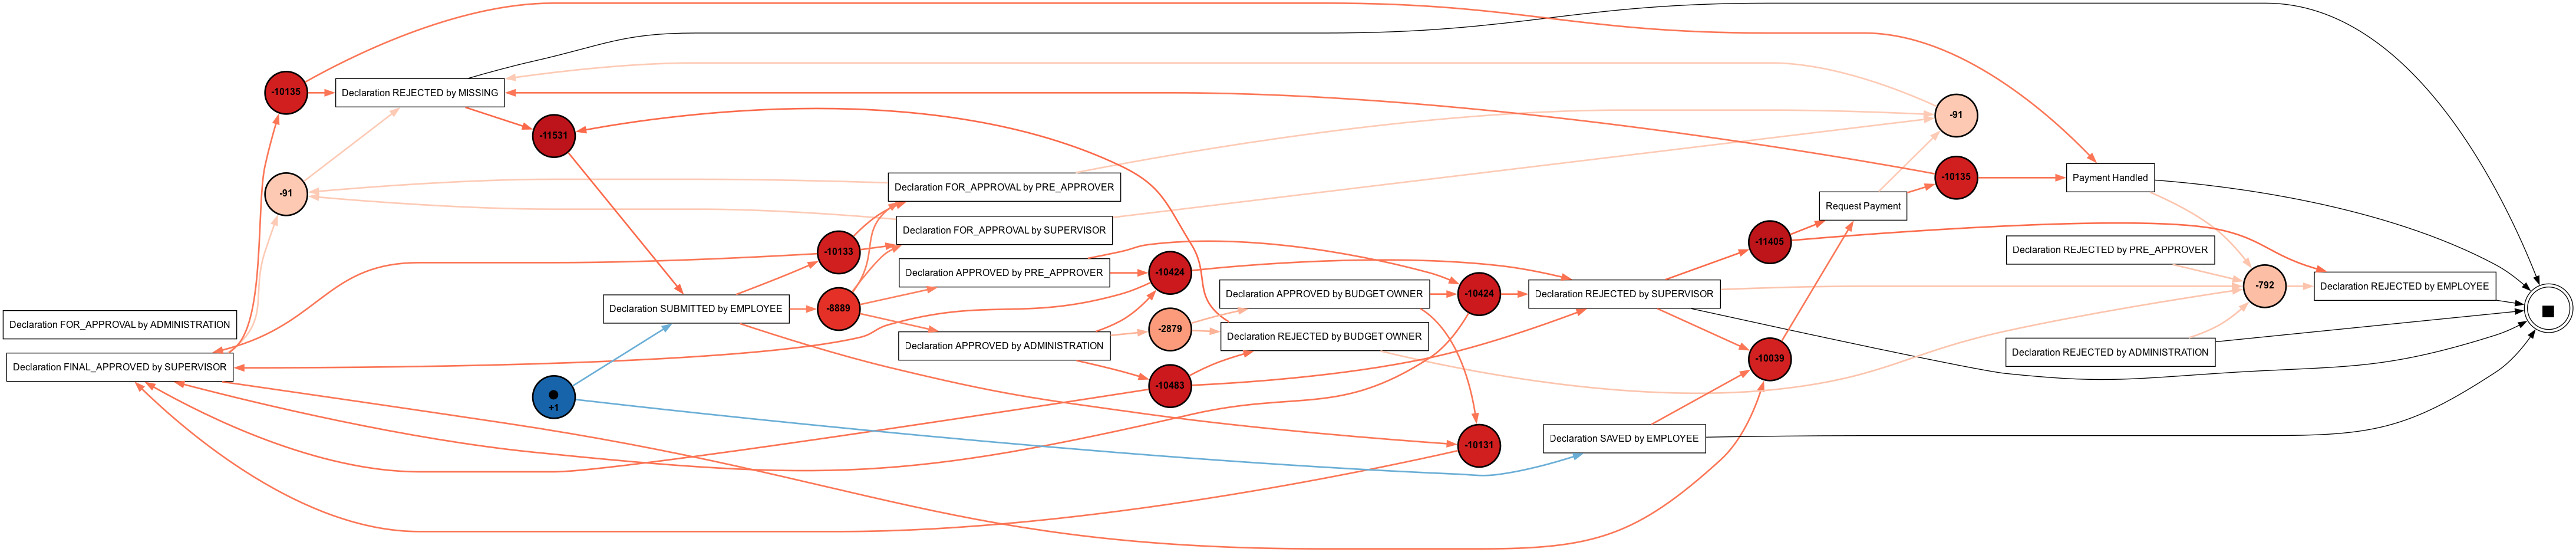

MinerType HM


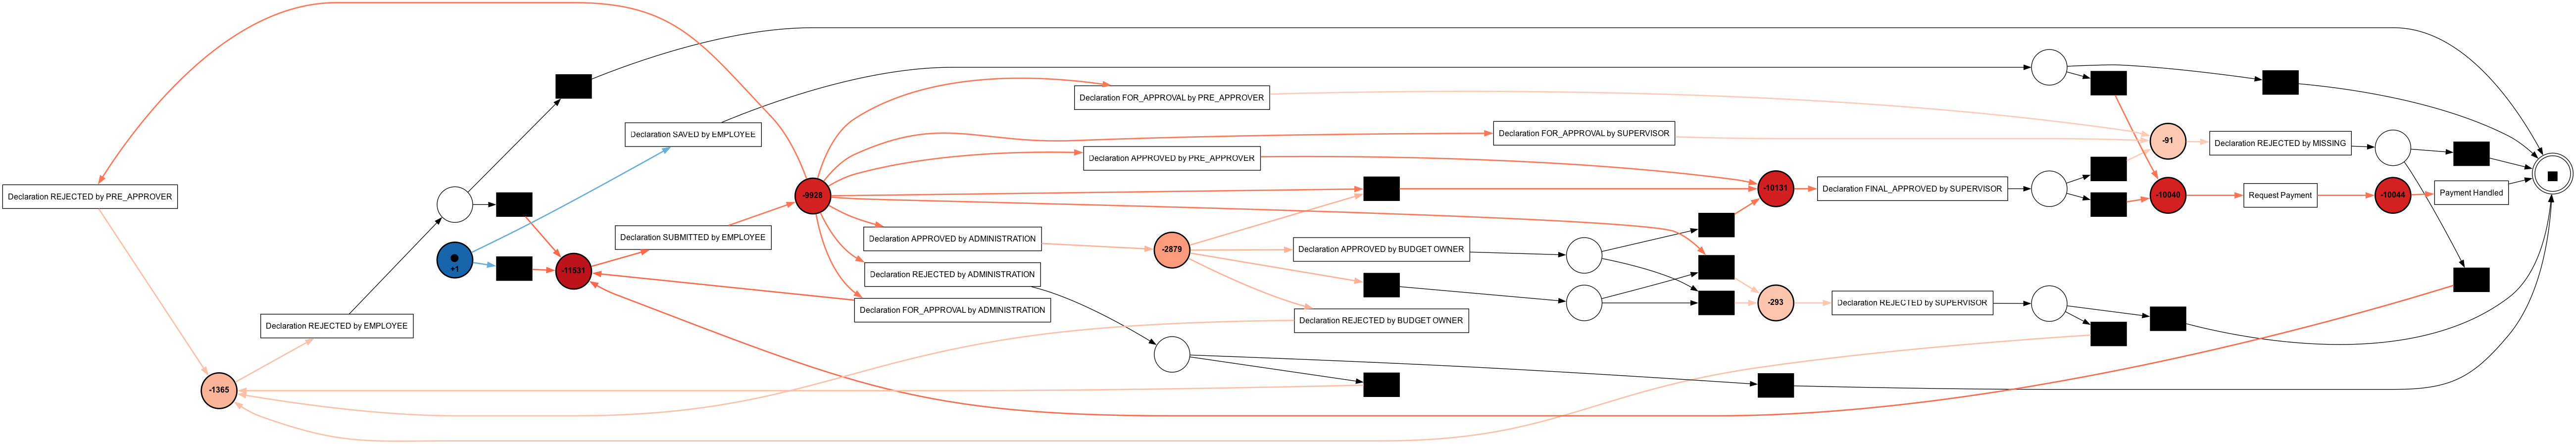

MinerType IM


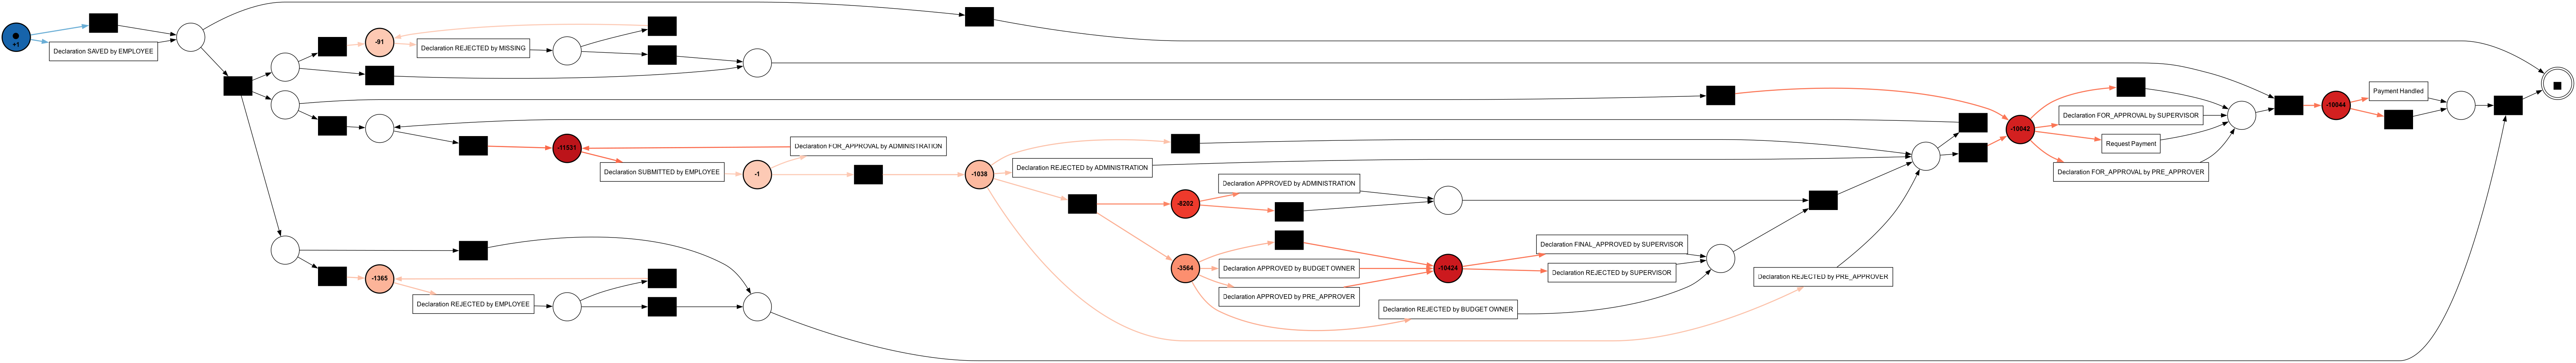

MinerType IMi


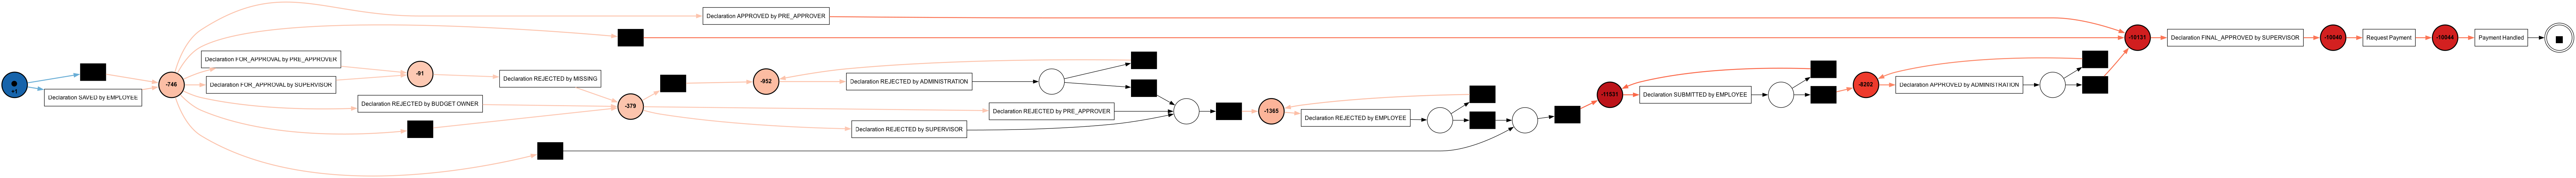

===== Pareto Efficient Models for log: real_eventlog =====


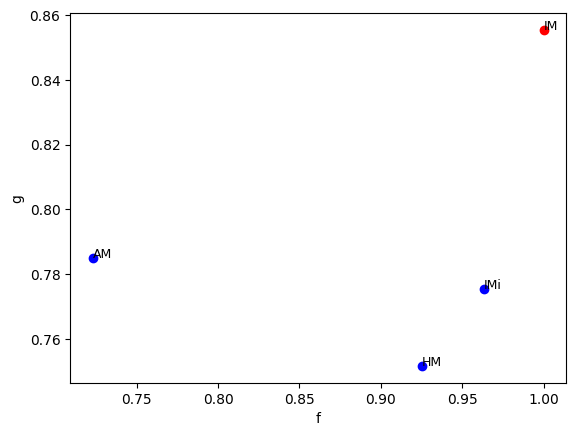

[{'type': 'IM', 'f': 1.0, 'g': 0.8554073029005208}]


In [9]:
compare_base_real_logs()